# Diccionario de Datos

### Definiciones de Términos Clave
Accesos: Se refiere al número de conexiones a internet registradas. Estas conexiones pueden ser a través de diversas tecnologías como ADSL, fibra óptica, cable módem, etc.

Penetración: Es el porcentaje de hogares o individuos que tienen acceso a internet en una determinada área geográfica. Se puede medir en términos de penetración en la población o en los hogares.

Velocidad de Conexión: Clasificación de las conexiones a internet según la velocidad de descarga, expresada en Mbps (Megabits por segundo). Ejemplos: 0,256 Mbps, 1 Mbps, 10 Mbps, etc.

Tecnología de Conexión: Tipo de tecnología utilizada para proporcionar el servicio de internet, como ADSL, fibra óptica, cable módem, dial-up, etc.

Ingresos: Monto de dinero generado por los servicios de internet en un periodo específico, expresado en miles de pesos.

### Datos de cada Hoja (Resumen)

Acc_vel_loc_sinrangos: Proporciona datos detallados de accesos a internet por diferentes velocidades de conexión en varias localidades de Argentina.

Velocidad_sin_Rangos: Muestra estadísticas de acceso a internet desglosadas por velocidad y provincia.

Velocidad % por prov: Presenta el porcentaje de accesos a internet por rangos de velocidad en cada provincia.

Totales VMD: Contiene los totales de velocidad media descargada (VMD) por región.

Accesos_tecnologia_localidad: Incluye los accesos a internet por tecnología en diferentes localidades.

Totales Accesos Por Tecnología: Muestra los totales de accesos a internet desglosados por cada tipo de tecnología.

Accesos Por Tecnología: Detalla los accesos a internet por tecnología en diferentes provincias.

Dial-BAf: Presenta los datos de accesos dial-up y Banda Ancha Fija.

Totales Dial-BAf: Muestra los totales de accesos dial-up y Banda Ancha Fija.

Penetración-poblacion: Incluye los datos de penetración de internet en la población.

Penetracion-hogares: Proporciona información sobre la penetración de internet en hogares.

Penetracion-totales: Presenta los totales de penetración de internet.

Totales Accesos por velocidad: Muestra los totales de accesos a internet por diferentes velocidades de conexión.

Accesos por velocidad: Detalla los accesos a internet desglosados por velocidad en cada provincia.

Ingresos: Contiene los datos de ingresos generados por los servicios de internet.

# Análisis Exploratorio de Datos (EDA)

### Librerías
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import seaborn as sns

import datetime

import plotly.graph_objects as go

### Datasets (df)
('datos/Internet.xlsx', sheet_name='Acc_vel_loc_sinrangos')

('datos/Internet.xlsx', sheet_name='Velocidad_sin_Rangos')

('datos/Internet.xlsx', sheet_name='Accesos_tecnologia_localidad')

('datos/Internet.xlsx', sheet_name='Velocidad % por prov')

('datos/Internet.xlsx', sheet_name='Totales VMD')

('datos/Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')

('datos/Internet.xlsx', sheet_name='Dial-BAf')

('datos/Internet.xlsx', sheet_name='Penetracion-hogares')

('datos/Internet.xlsx', sheet_name='Ingresos ')

### SE LIMPIAN LOS DATOS DE NO TODOS LOS DATASETS, SINO LOS MAS RELEVANTES PARA ESTE PROYECTO.

### LUEGO SE EXPORTA EN CADA UNO UNO (O MÁS) CSV PARA USARLO EN POWER BI SI SE LO REQUIERE ESPECIALMENTE, ADEMAS DE ANALISAR INDIVIDUALMENTE ALGUNOS DATOS IMPORTANTES QUE NOS MUESTRAN EN LOS GRAFICOS DE CADA DATASET

Categorías en categoria_por_provincia: Index(['Alta', 'Baja', 'Media'], dtype='object', name='Categoria')


<Figure size 1500x800 with 0 Axes>

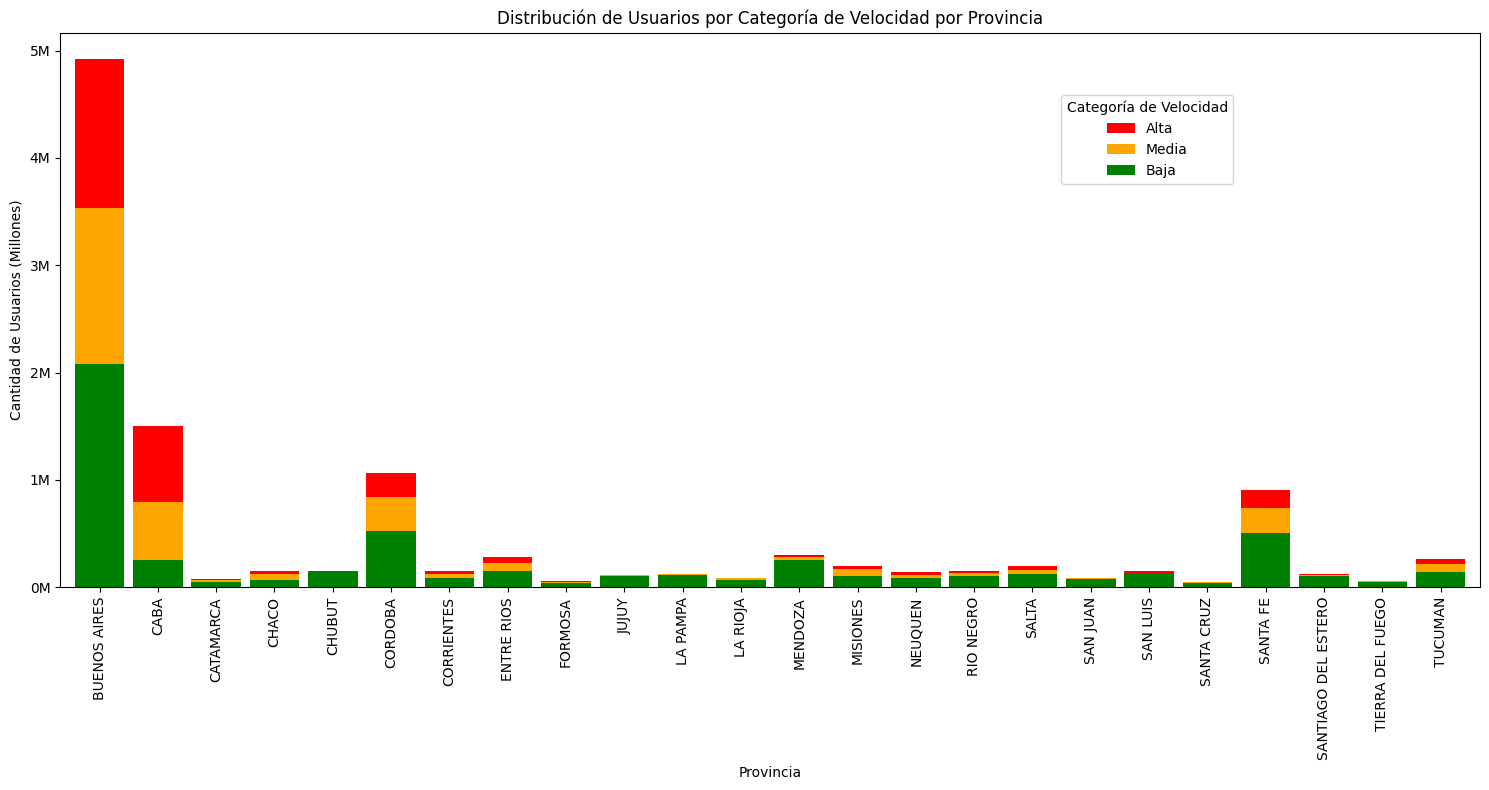

Provincia: BUENOS AIRES
  Usuarios con Velocidad Baja: 2083798
  Usuarios con Velocidad Media: 1453316
  Usuarios con Velocidad Alta: 1382296
  Total de Usuarios: 4919410

Provincia: CABA
  Usuarios con Velocidad Baja: 250103
  Usuarios con Velocidad Media: 544447
  Usuarios con Velocidad Alta: 710161
  Total de Usuarios: 1504711

Provincia: CATAMARCA
  Usuarios con Velocidad Baja: 47780
  Usuarios con Velocidad Media: 17758
  Usuarios con Velocidad Alta: 9325
  Total de Usuarios: 74863

Provincia: CHACO
  Usuarios con Velocidad Baja: 68250
  Usuarios con Velocidad Media: 57644
  Usuarios con Velocidad Alta: 25833
  Total de Usuarios: 151727

Provincia: CHUBUT
  Usuarios con Velocidad Baja: 152584
  Usuarios con Velocidad Media: 1258
  Usuarios con Velocidad Alta: 194
  Total de Usuarios: 154036

Provincia: CORDOBA
  Usuarios con Velocidad Baja: 527444
  Usuarios con Velocidad Media: 314675
  Usuarios con Velocidad Alta: 225370
  Total de Usuarios: 1067489

Provincia: CORRIENTES
  Usua

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Función para formatear las etiquetas del eje Y en millones
def formatear_millones(x, pos):
    return f'{x * 1e-6:.0f}M'

# Cargar los datos
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Acc_vel_loc_sinrangos')

# Convertir los datos a formato largo
df_melted = df.melt(id_vars='Provincia', var_name='Velocidad_Categoria', value_name='Usuarios')

# Eliminar filas con valores de usuarios faltantes
df_melted = df_melted.dropna(subset=['Usuarios'])

# Convertir la columna 'Usuarios' a numérico y eliminar valores no válidos
df_melted.loc[:, 'Usuarios'] = pd.to_numeric(df_melted['Usuarios'], errors='coerce')
df_melted = df_melted.dropna(subset=['Usuarios'])

# Clasificar las velocidades en categorías
def clasificar_velocidad(velocidad):
    if 'Mbps' in velocidad: # Modified condition to check for 'Mbps' in the string
        # Replace comma with dot for decimal separator before converting to integer
        velocidad_num = float(velocidad.split(' ')[0].replace(',', '.'))
        if velocidad_num <= 50:
            return 'Baja'
        elif velocidad_num <= 200:
            return 'Media'
        else:
            return 'Alta'
    else:
        return None

df_melted['Categoria'] = df_melted['Velocidad_Categoria'].apply(clasificar_velocidad)

# Contar la cantidad de usuarios por categoría y provincia
categoria_por_provincia = df_melted.groupby(['Provincia', 'Categoria'])['Usuarios'].sum().unstack(fill_value=0)

# Verificar los nombres de las categorías y ajustar las columnas
print("Categorías en categoria_por_provincia:", categoria_por_provincia.columns)

# Reordenar las columnas según el orden deseado (Baja, Media, Alta)
categorias = ['Baja', 'Media', 'Alta']
# Asegurarse de que todas las categorías están presentes
categoria_por_provincia = categoria_por_provincia.reindex(columns=categorias, fill_value=0)

# Calcular la cantidad total de usuarios por provincia
usuarios_totales_por_provincia = df_melted.groupby('Provincia')['Usuarios'].sum().sort_values()

# Gráfico de barras verticales: Categorías por provincia
plt.figure(figsize=(15, 8))
categoria_por_provincia.plot(kind='bar', stacked=True, figsize=(15, 8), color=['green', 'orange', 'red'], width=0.85)
plt.title('Distribución de Usuarios por Categoría de Velocidad por Provincia')
plt.ylabel('Cantidad de Usuarios (Millones)')
plt.xlabel('Provincia')
plt.xticks(rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 0]  # Reordenar para que Alta (verde) esté primero, Media (naranja) en el medio y Baja (roja) al final
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Categoría de Velocidad', loc='upper left', bbox_to_anchor=(0.7, 0.9))

# Formatear el eje Y para mostrar en millones
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatear_millones))

plt.tight_layout()
plt.show()


# Mostrar la cantidad de usuarios por categoría en cada provincia
for provincia in categoria_por_provincia.index:
    baja = int(categoria_por_provincia.loc[provincia, 'Baja'])
    media = int(categoria_por_provincia.loc[provincia, 'Media'])
    alta = int(categoria_por_provincia.loc[provincia, 'Alta'])
    total_usuarios = int(baja + media + alta)
    print(f"Provincia: {provincia}")
    print(f"  Usuarios con Velocidad Baja: {baja}")
    print(f"  Usuarios con Velocidad Media: {media}")
    print(f"  Usuarios con Velocidad Alta: {alta}")
    print(f"  Total de Usuarios: {total_usuarios}")
    print()


# Guardar el DataFrame procesado como CSV
df_melted.to_csv('datos/usuarios_por_categoria_provincia.csv', index=False)

# También puedes guardar el DataFrame con la suma por provincia y categoría
categoria_por_provincia.to_csv('datos/categoria_por_provincia.csv')

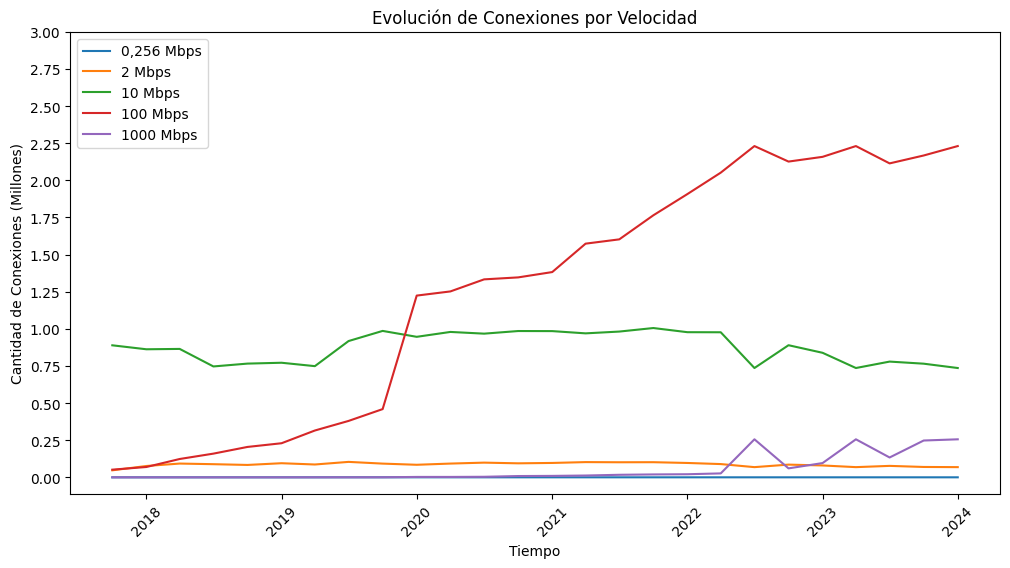

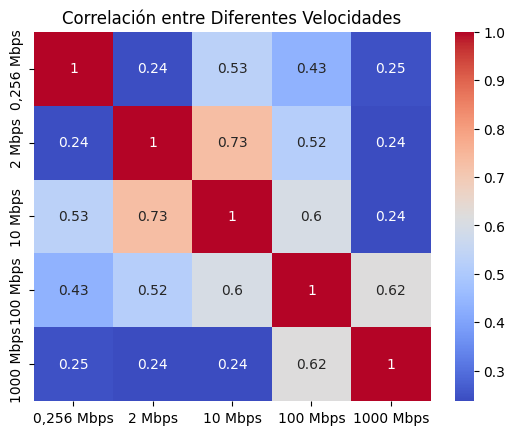

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Cargar datos
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Velocidad_sin_Rangos')

# Agrupar por Año y Trimestre y convertir columnas a enteros
df_time = df.groupby(['Año', 'Trimestre']).sum().reset_index()
df_time['Año'] = df_time['Año'].astype(int)
df_time['Trimestre'] = df_time['Trimestre'].astype(int)

# Seleccionar algunas velocidades de interés
velocidades = ['0,256 Mbps', '2 Mbps', '10 Mbps', '100 Mbps', '1000 Mbps']

# Crear una columna de fechas
df_time['Fecha'] = df_time.apply(lambda row: datetime.datetime(row['Año'], (row['Trimestre'] - 1) * 3 + 1, 1), axis=1)

# Graficar evolución temporal
plt.figure(figsize=(12, 6))

for velocidad in velocidades:
    plt.plot(df_time['Fecha'], df_time[velocidad] / 1e6, label=velocidad)  # Dividir por 1e6 para convertir a millones

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Conexiones (Millones)')
plt.title('Evolución de Conexiones por Velocidad')
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X

# Ajustar el eje y
plt.yticks([i * 0.25 for i in range(13)])  # Agregar más valores en el eje y

# Mostrar el gráfico
plt.show()

print()

# Ejemplo de correlación entre diferentes velocidades
sns.heatmap(df[velocidades].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Diferentes Velocidades')
plt.show()

# Guardar el DataFrame df_time con las fechas y sumas por velocidad
df_time.to_csv('datos/evolucion_conexiones_por_velocidad.csv', index=False)

# Guardar las correlaciones en un CSV
correlaciones = df[velocidades].corr()
correlaciones.to_csv('datos/correlacion_velocidades.csv')

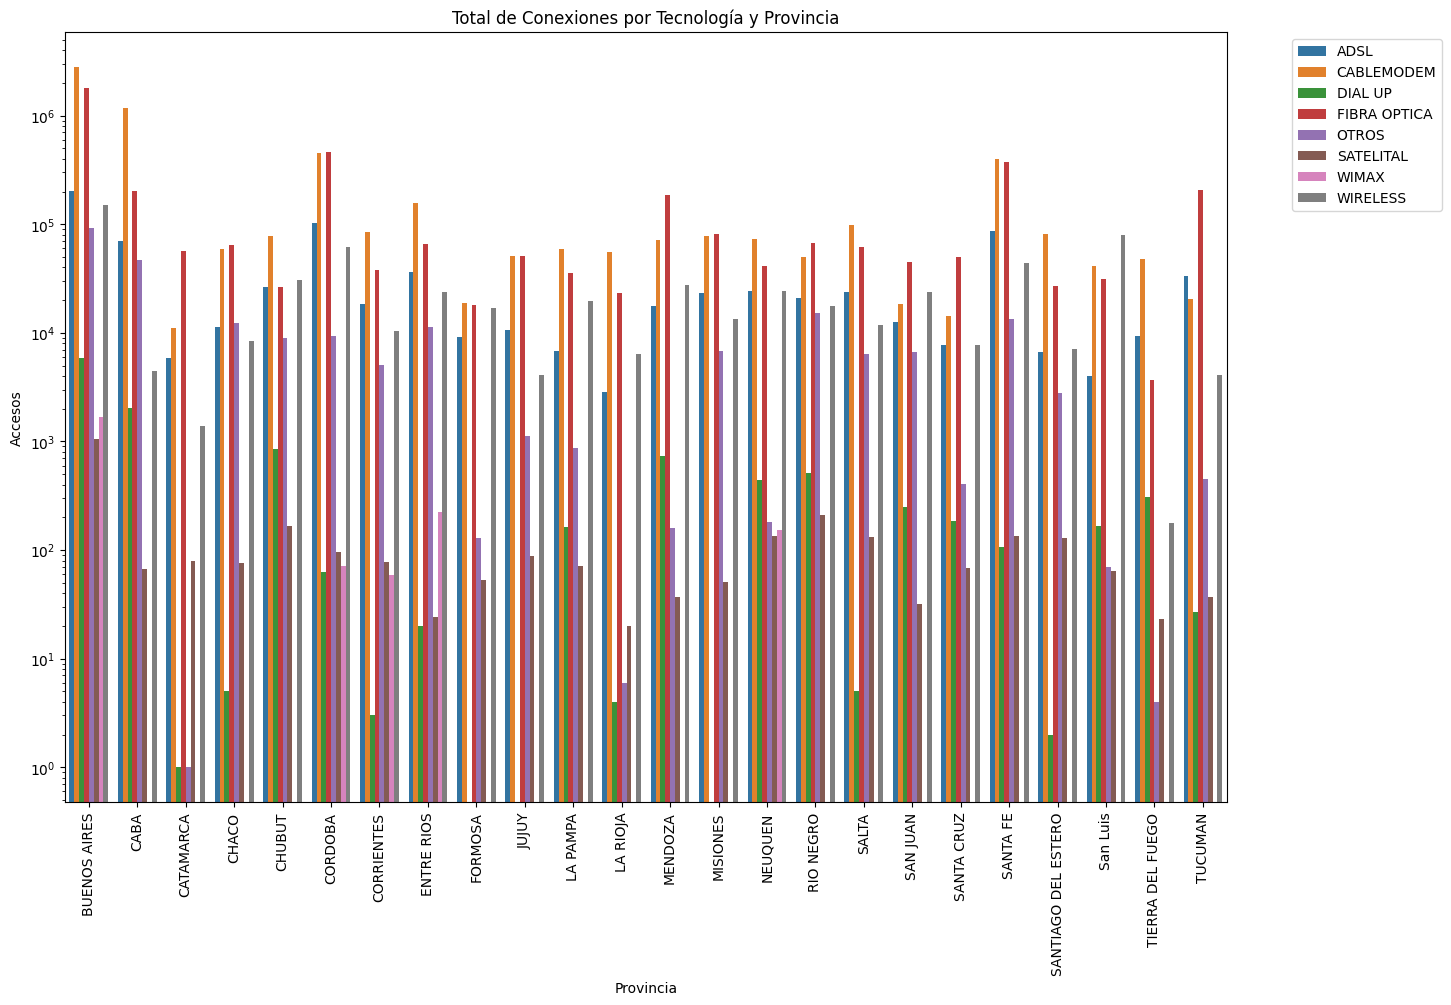

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo Excel
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Accesos_tecnologia_localidad')

# Seleccionar solo las columnas numéricas y la columna de 'Provincia'
columns_to_sum = ['Provincia', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
df_num = df[columns_to_sum]

# Agrupar por Provincia y sumar las conexiones por tecnología
df_grouped = df_num.groupby('Provincia').sum().reset_index()

# Crear el DataFrame fundido (melted) para las tecnologías
df_melted = df_grouped.melt(id_vars=['Provincia'], value_vars=columns_to_sum[1:], var_name='Tecnología', value_name='Accesos')

# Gráfico de barras apiladas
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=df_melted, x='Provincia', y='Accesos', hue='Tecnología')
plt.xticks(rotation=90)
plt.title('Total de Conexiones por Tecnología y Provincia')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Establecer el eje y en escala logarítmica
ax.set_yscale("log")

plt.show()

# Guardar el DataFrame agrupado como CSV
df_grouped.to_csv('datos/conexiones_por_tecnologia_provincia.csv', index=False)

# Guardar el DataFrame fundido (melted) como CSV
df_melted.to_csv('datos/conexiones_fundidas_por_tecnologia.csv', index=False)


C:\Users\Familia\AppData\Local\Temp\ipykernel_13440\1435438936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Provincia'] = df_num['Provincia'].astype(str)
C:\Users\Familia\AppData\Local\Temp\ipykernel_13440\1435438936.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[columns_to_sum[1:]] = df_num[columns_to_sum[1:]].apply(pd.to_numeric, errors='coerce')


Tipos de datos en df_num después de la conversión:
Provincia       object
ADSL             int64
CABLEMODEM       int64
DIAL UP          int64
FIBRA OPTICA     int64
OTROS            int64
SATELITAL        int64
WIMAX            int64
WIRELESS         int64
dtype: object
Datos agrupados:
      Provincia    ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  \
0  BUENOS AIRES  203297     2790663     5900       1799013  92651       1061   
1          CABA   70108     1177475     2050        203756  46762         67   
2     CATAMARCA    5901       11025        1         56542      1         79   
3         CHACO   11343       58929        5         64463  12323         76   
4        CHUBUT   26306       77217      857         26356   8906        167   

   WIMAX  WIRELESS  
0   1682    150290  
1      0      4493  
2      0      1384  
3      0      8404  
4      0     30867  


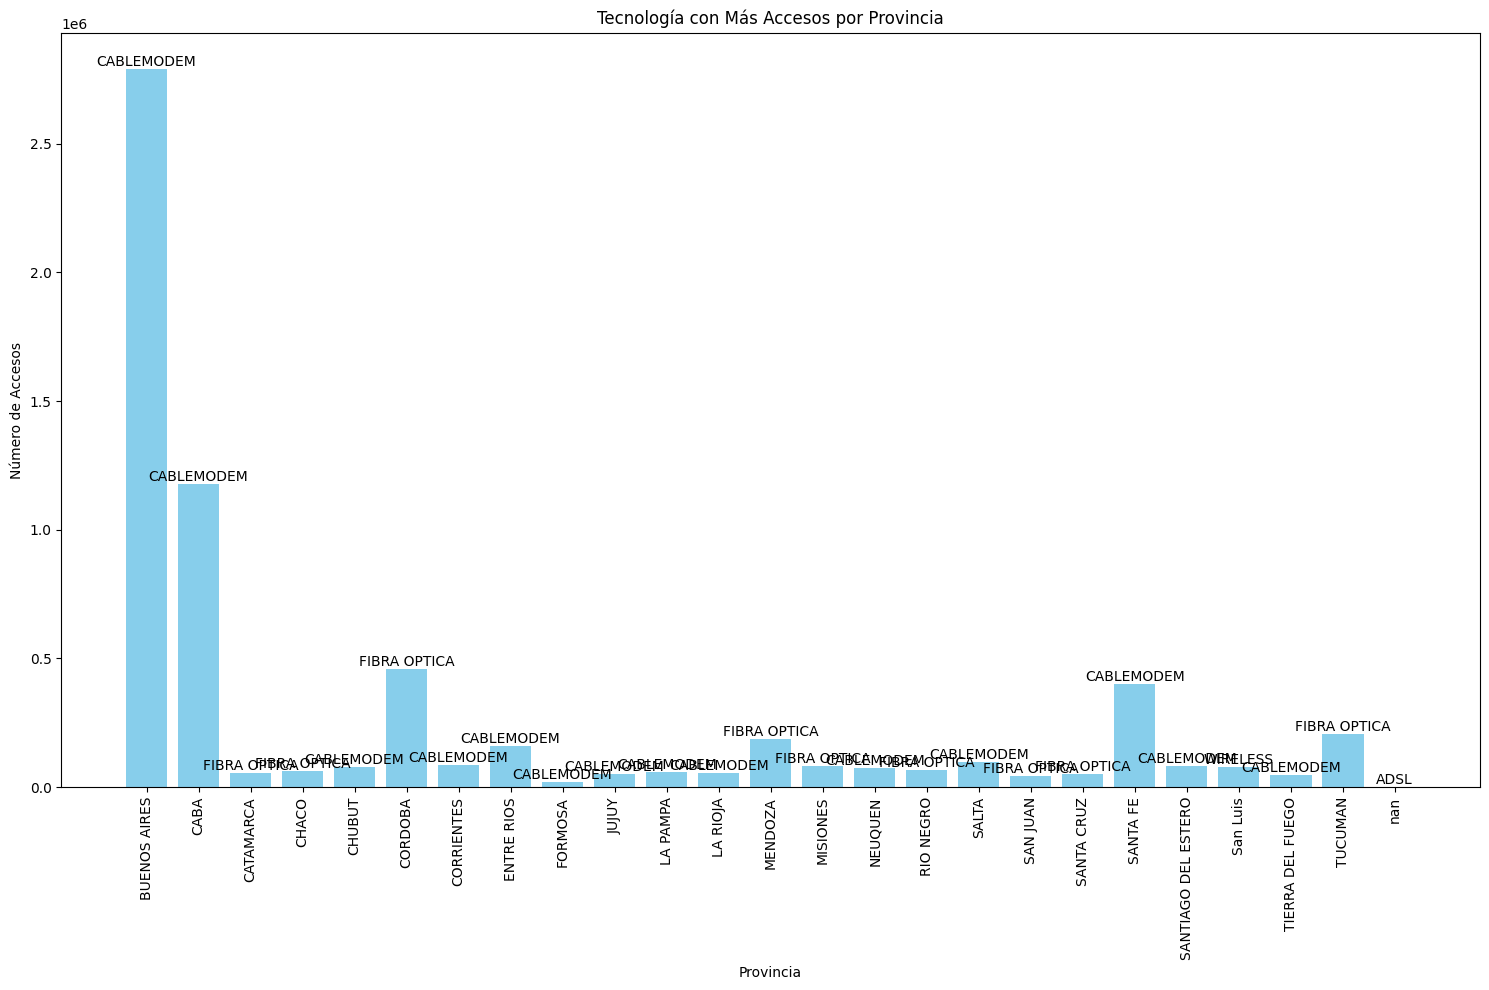

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Accesos_tecnologia_localidad')

# Seleccionar solo las columnas numéricas y la columna de 'Provincia'
columns_to_sum = ['Provincia', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
df_num = df[columns_to_sum]

# Convertir la columna 'Provincia' a tipo string
df_num['Provincia'] = df_num['Provincia'].astype(str)

# Convertir las demás columnas a tipo numérico, forzando errores a NaN
df_num[columns_to_sum[1:]] = df_num[columns_to_sum[1:]].apply(pd.to_numeric, errors='coerce')

# Verificar los tipos de datos de las columnas
print("Tipos de datos en df_num después de la conversión:")
print(df_num.dtypes)

# Agrupar por Provincia y sumar las conexiones por tecnología
df_grouped = df_num.groupby('Provincia').sum().reset_index()

# Verificar la tabla agrupada
print("Datos agrupados:")
print(df_grouped.head())

# Identificar la tecnología con más accesos en cada provincia
def most_popular_technology(row):
    technologies = row[1:]  # Omitir la columna 'Provincia'
    return technologies.idxmax(), technologies.max()

df_grouped[['Tecnología más popular', 'Accesos más populares']] = df_grouped.apply(most_popular_technology, axis=1, result_type='expand')

# Crear el gráfico
plt.figure(figsize=(15, 10))
plt.bar(df_grouped['Provincia'], df_grouped['Accesos más populares'], color='skyblue')

# Añadir etiquetas y títulos
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Número de Accesos')
plt.title('Tecnología con Más Accesos por Provincia')

# Añadir etiquetas de texto
for i, row in df_grouped.iterrows():
    plt.text(i, row['Accesos más populares'] + 50, row['Tecnología más popular'], ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Guardar el DataFrame agrupado como CSV
df_grouped.to_csv('datos/tecnologia_mas_popular_por_provincia.csv', index=False)

## Nota: El csv de este dataset se uso para Power BI

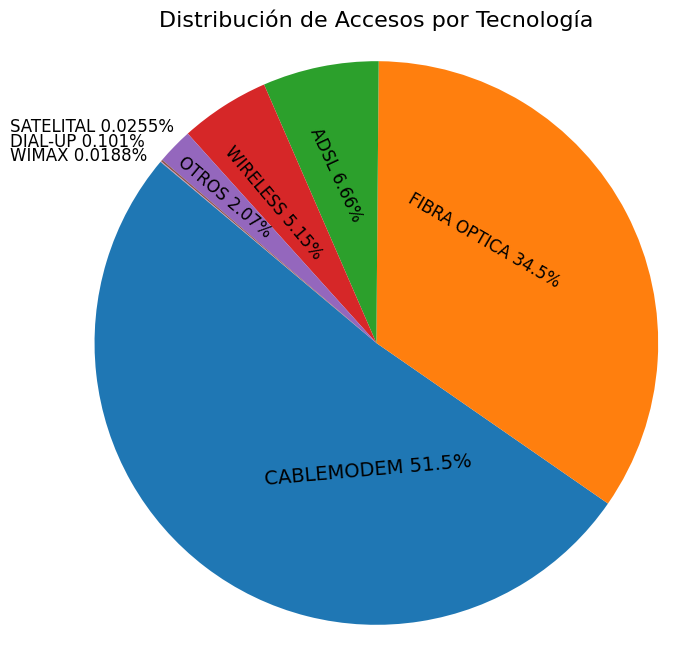

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Asegúrate de importar numpy

# Cargar los datos desde el archivo Excel
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Accesos_tecnologia_localidad')

# Seleccionar solo las columnas numéricas y la columna de 'Provincia'
columns_to_sum = ['Provincia', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
df_num = df[columns_to_sum].copy()

# Convertir la columna 'Provincia' a tipo string
df_num['Provincia'] = df_num['Provincia'].astype(str)

# Convertir las demás columnas a tipo numérico, forzando errores a NaN
df_num[columns_to_sum[1:]] = df_num[columns_to_sum[1:]].apply(pd.to_numeric, errors='coerce')

# Agrupar por Provincia y sumar las conexiones por tecnología
df_grouped = df_num.groupby('Provincia').sum().reset_index()

# Sumar los accesos de todas las provincias para cada tecnología
data_tecnologias = df_grouped.drop(columns='Provincia').sum()

# Ordenar los datos por el tamaño de los segmentos
data_tecnologias = data_tecnologias.sort_values(ascending=False)

# Extraer los labels y values de data_tecnologias
labels = data_tecnologias.index.tolist()
values = data_tecnologias.values.tolist()

# Crear el gráfico de torta sin etiquetas ni porcentajes
plt.figure(figsize=(8, 8))
plt.pie(values, labels=['']*len(labels), startangle=140, textprops={'fontsize': 0})

# Ajustar la posición de las etiquetas manualmente
plt.text(0.1, 0.2, 'FIBRA OPTICA 34.5%', rotation=-30, fontsize=12)
plt.text(-0.25, 0.435, 'ADSL 6.66%', rotation=-65, fontsize=12)
plt.text(-0.715, 0.375, 'OTROS 2.07%', rotation=-40, fontsize=12)
plt.text(-0.4, -0.5, 'CABLEMODEM 51.5%', rotation=5, fontsize=14)
plt.text(-0.55, 0.3, 'WIRELESS 5.15%', rotation=-50, fontsize=12)
plt.text(-1.3, 0.7, 'DIAL-UP 0.101%', rotation=0, fontsize=12)
plt.text(-1.3, 0.75, 'SATELITAL 0.0255%', rotation=0, fontsize=12)
plt.text(-1.3, 0.65, 'WIMAX 0.0188%', rotation=0, fontsize=12)

# Añadir título
plt.title('Distribución de Accesos por Tecnología', fontsize=16)

# Mostrar el gráfico
plt.axis('equal')
plt.show()


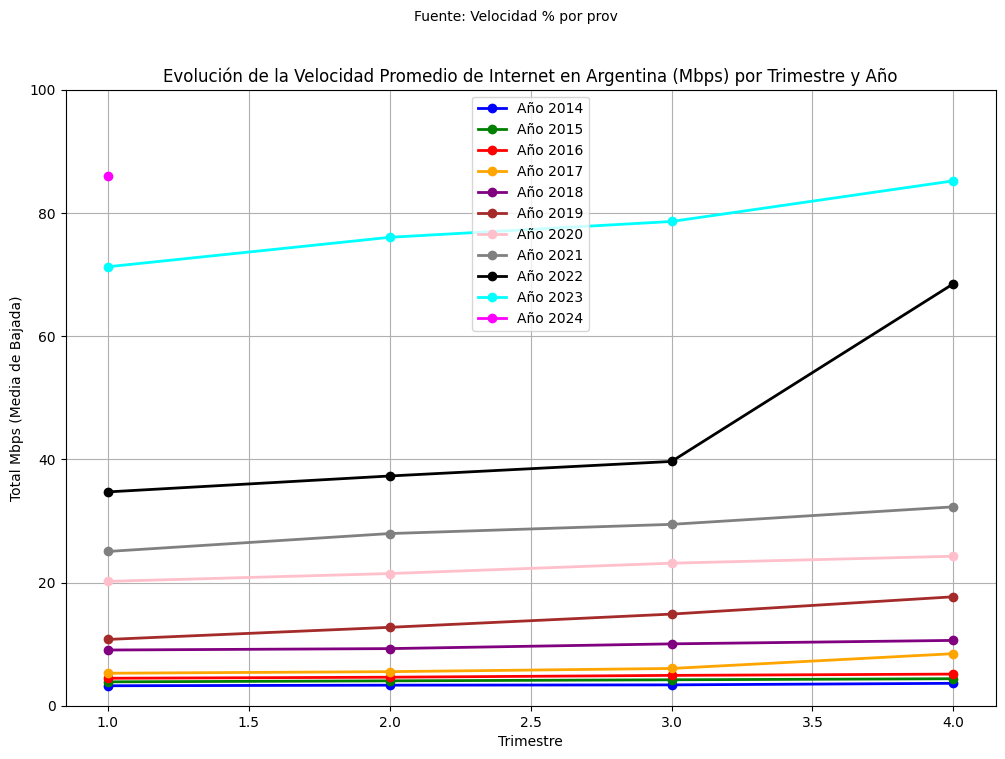

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Velocidad % por prov')

# Agrupar por Año y Trimestre y calcular el promedio de las velocidades de todas las provincias
df_grouped = df.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].mean().reset_index()

# Crear un gráfico de línea para visualizar la tendencia
plt.figure(figsize=(12, 8))
# Adapta los colores según tus preferencias, asegurando que haya suficientes colores para cada año
# Add more colors to the list to match the number of unique years
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'black', 'cyan', 'magenta', 'yellow'] # Added more colors to handle more years
for i, year in enumerate(df_grouped['Año'].unique()):
    subset = df_grouped[df_grouped['Año'] == year]
    plt.plot(subset['Trimestre'], subset['Mbps (Media de bajada)'], marker='o', label=f'Año {year}', color=colors[i], linewidth=2)

plt.title('Evolución de la Velocidad Promedio de Internet en Argentina (Mbps) por Trimestre y Año')
plt.suptitle('Fuente: Velocidad % por prov', fontsize=10)
plt.xlabel('Trimestre')
plt.ylabel('Total Mbps (Media de Bajada)')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)  # Ajusta según tus datos
plt.show()

# Guardar el DataFrame agrupado como un archivo CSV
df_grouped.to_csv('datos/velocidad_promedio_por_trimestre.csv', index=False)

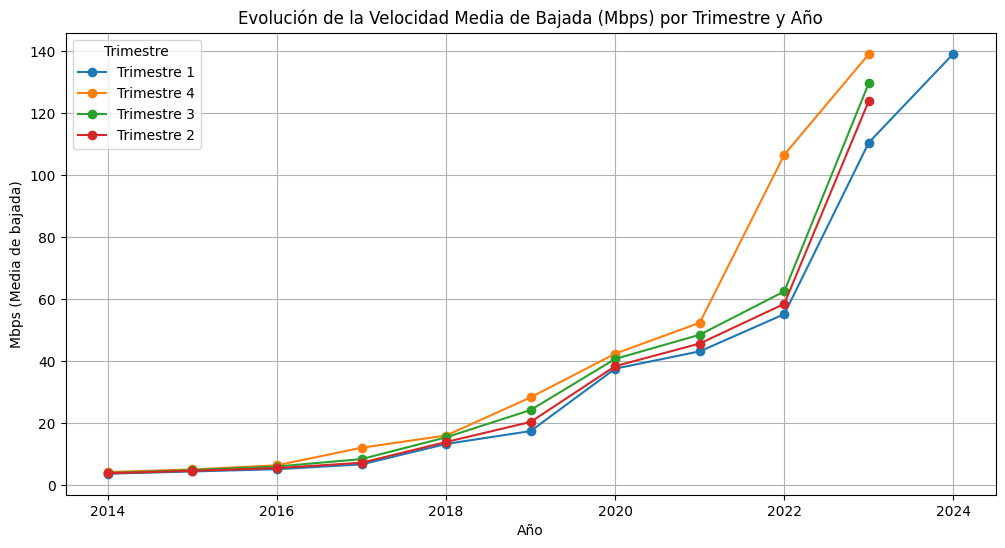

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Totales VMD')

# Crear un gráfico de la evolución de la velocidad media de bajada (Mbps) a lo largo de los trimestres y años
plt.figure(figsize=(12, 6))
for trimestre in df['Trimestre'].unique():
    data_trimestre = df[df['Trimestre'] == trimestre]
    plt.plot(data_trimestre['Año'], data_trimestre['Mbps (Media de bajada)'], marker='o', label=f'Trimestre {trimestre}')

plt.title('Evolución de la Velocidad Media de Bajada (Mbps) por Trimestre y Año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Trimestre')
plt.grid(True)
plt.show()

# Guardar el DataFrame como un archivo CSV
df.to_csv('datos/velocidad_media_bajada.csv', index=False)

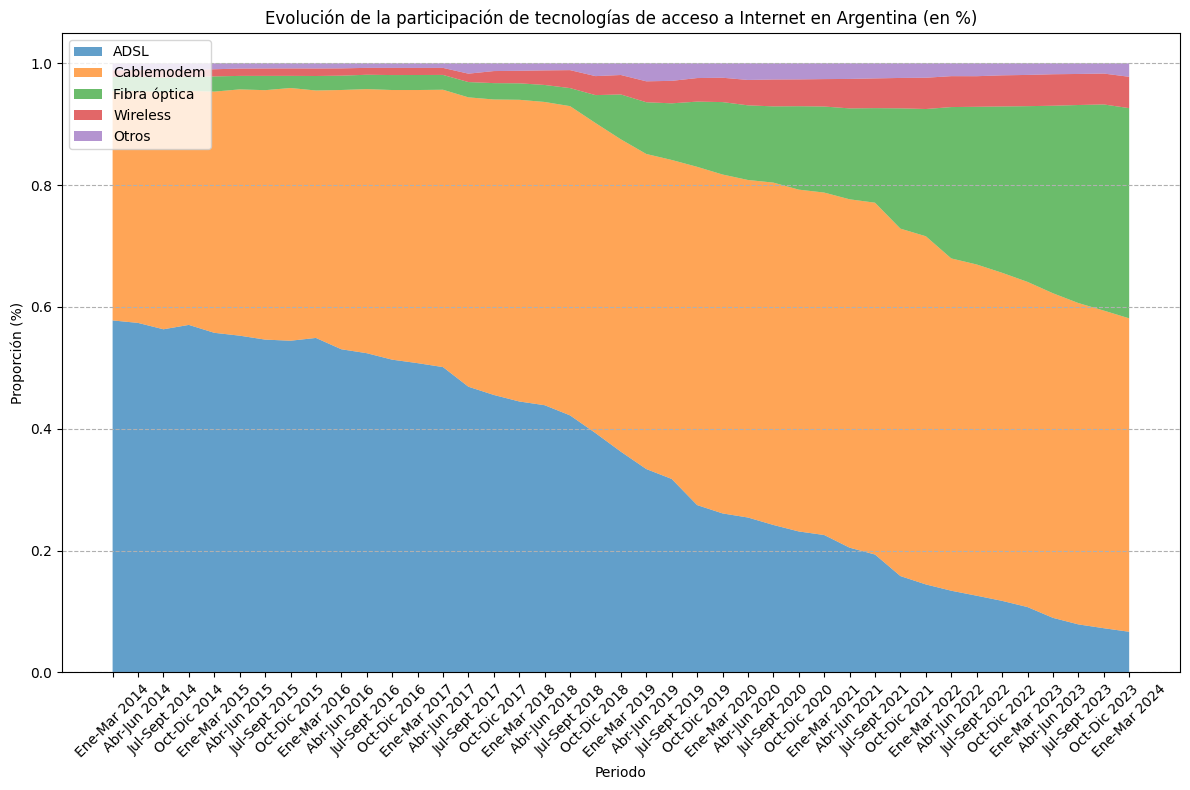

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')

# Calcular las proporciones
df['ADSL (%)'] = df['ADSL'] / df['Total']
df['Cablemodem (%)'] = df['Cablemodem'] / df['Total']
df['Fibra óptica (%)'] = df['Fibra óptica'] / df['Total']
df['Wireless (%)'] = df['Wireless'] / df['Total']
df['Otros (%)'] = df['Otros'] / df['Total']

# Crear el gráfico de líneas apiladas
plt.figure(figsize=(12, 8))
plt.stackplot(df['Periodo'], df['ADSL (%)'], df['Cablemodem (%)'], df['Fibra óptica (%)'], df['Wireless (%)'], df['Otros (%)'],
              labels=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'],
              colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], alpha=0.7)

plt.legend(loc='upper left')
plt.title('Evolución de la participación de tecnologías de acceso a Internet en Argentina (en %)')
plt.xlabel('Periodo')
plt.ylabel('Proporción (%)')

# Invierte el eje X
plt.gca().invert_xaxis()

plt.xticks(rotation=45, fontsize=10)  # Ajusta el ángulo y tamaño de fuente
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

# Guardar el DataFrame como un archivo CSV
df.to_csv('datos/proporciones_accesos_tecnologia.csv', index=False)

Suma total de Banda ancha fija: 357821852
Suma total de Dial up: 890795.0
     Año   Dial up
0   2014  147760.0
1   2015  136270.0
2   2016  122282.0
3   2017  112863.0
4   2018  102609.0
5   2019   75487.0
6   2020   40039.0
7   2021   43616.0
8   2022   49938.0
9   2023   48138.0
10  2024   11793.0


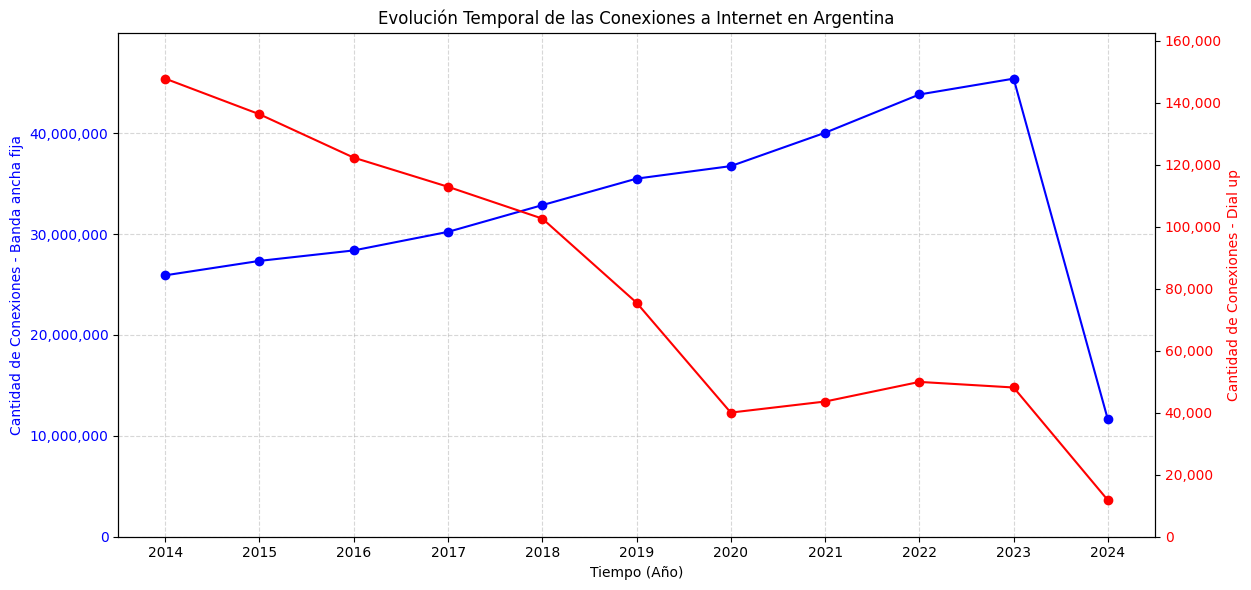

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar los datos
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Dial-BAf')

# Manejar valores nulos en "Dial up" (rellenar con 0)
df['Dial up'] = df['Dial up'].fillna(0)

# Agrupar los datos solo por año, sumando las conexiones de todos los trimestres
df_grouped = df.groupby(['Año'])[['Banda ancha fija', 'Dial up']].sum().reset_index()

# Guardar el DataFrame agrupado como un archivo CSV
df_grouped.to_csv('datos/evolucion_conexiones_internet.csv', index=False)

# Verificar sumas totales
total_banda_ancha = df_grouped['Banda ancha fija'].sum()
total_dial_up = df_grouped['Dial up'].sum()

print(f"Suma total de Banda ancha fija: {total_banda_ancha}")
print(f"Suma total de Dial up: {total_dial_up}")

# Verificar los valores agrupados para 'Dial up'
print(df_grouped[['Año', 'Dial up']])

# Crear etiquetas de tiempo usando solo el año
df_grouped['Tiempo'] = pd.to_datetime(df_grouped['Año'], format='%Y')

# Crear un gráfico de líneas para mostrar la evolución temporal con ejes separados
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje para Banda ancha fija
ax1.plot(df_grouped['Tiempo'], df_grouped['Banda ancha fija'], marker='o', color='b', label='Banda ancha fija')
ax1.set_xlabel('Tiempo (Año)')
ax1.set_ylabel('Cantidad de Conexiones - Banda ancha fija', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Eje para Dial up
ax2 = ax1.twinx()
ax2.plot(df_grouped['Tiempo'], df_grouped['Dial up'], marker='o', color='r', label='Dial up')
ax2.set_ylabel('Cantidad de Conexiones - Dial up', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Formatear el eje X para que muestre solo el año
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')

# Título y configuración del gráfico
plt.title('Evolución Temporal de las Conexiones a Internet en Argentina')
ax1.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Ajustar los límites de los ejes Y de forma manual para ambos ejes
ax1.set_ylim(0, df_grouped['Banda ancha fija'].max() * 1.1)
ax2.set_ylim(0, df_grouped['Dial up'].max() * 1.1)

# Formatear el eje Y para evitar la notación científica
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar los datos
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Penetracion-hogares')

# Limpiar el dataset eliminando filas con valores vacíos
df_cleaned = df.dropna()

# Guardar el dataset limpio en un archivo CSV
df_cleaned.to_csv('datos/penetracion_hogares_limpio.csv', index=False)

print("Dataset limpio guardado como 'penetracion_hogares_limpio.csv'")

Dataset limpio guardado como 'penetracion_hogares_limpio.csv'


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar los datos
df = pd.read_excel('datos/Internet.xlsx', sheet_name='Ingresos ')

# Limpiar el dataset eliminando filas con valores vacíos
df_cleaned = df.dropna()

# Guardar el dataset limpio en un archivo CSV
df_cleaned.to_csv('datos/ingresos.csv', index=False)

print("Dataset limpio guardado como 'ingresos.csv'")

Dataset limpio guardado como 'ingresos.csv'
